In [1]:
import sys
sys.path.append('../..')
from semantic_odes.api import SemanticODE, BSplineBasisFunctions, PolynomialBasisFunctions, create_full_composition_library, CompositionMap
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from semantic_odes.model_numpy import calculate_loss
from semantic_odes.datasets import get_pk_dataset, get_pk_dataset_extrapolation
from experiments.benchmark import run_benchmark, SemanticODEBenchmark, SINDyBenchmark, WeakSINDyBenchmark, generate_indices


def mean_rmse(y_true_list, y_pred_list):
    rmse_scores = [np.sqrt(np.mean((y_true_i - y_pred_i)**2)) for y_true_i, y_pred_i in zip(y_true_list, y_pred_list)]
    return np.mean(rmse_scores)

In [4]:
global_seed = 2

n_samples = 100
n_measurements = 20
noise_std = 0.01

pk_dataset = get_pk_dataset(n_samples=n_samples, n_measurements=n_measurements, noise_std=noise_std, seed=global_seed)
pk_dataset_extrapolation = get_pk_dataset_extrapolation(n_samples=n_samples, n_measurements=n_measurements*2, noise_std=noise_std, seed=global_seed)

In [ ]:
# composition_library = create_full_composition_library(max_length=4,is_infinite=True)

# filter through the composition library to remove compositions that do not end with -+h
# composition_library = [c for c in composition_library if c[-1] == '-+h']

In [5]:
composition_library = [['+-c', '--c', '-+h']]

In [7]:
opt_config = {
    'lr': 0.1,
    'n_epochs': 200,
    'batch_size': 256,
    'weight_decay': 0.0,
    'device': 'cpu',
    'dis_loss_coeff_1': 1e-2,
    'dis_loss_coeff_2': 1e-6,
    'n_tune':20
    # 'n_tune':0
}

config = {
    't_range': (0, 1),
    'basis_function_type': 'bspline',
    'num_basis_functions': 6,
    'max_branches': 3,
    'composition_library': composition_library,
    'opt_config': opt_config,
    'verbose': True,
    'subtype': 'default'
    }

basis_functions = BSplineBasisFunctions(n_basis=6,k=3, include_bias=True, include_linear=True)

# semantic_ode = SemanticODE((0,None),basis_functions,composition_library,max_branches=3,seed=global_seed,opt_config=opt_config,verbose=True)

semantic_ode_benchmark = SemanticODEBenchmark(config)

train_indices, val_indices, test_indices = generate_indices(n_samples, 0.7, 0.15, seed=global_seed)

In [8]:
semantic_ode_benchmark.prepare_data(pk_dataset, train_indices, val_indices, test_indices)

In [9]:
semantic_ode =  SemanticODE((0,1),basis_functions,composition_library,max_branches=3,seed=global_seed,opt_config=opt_config,verbose=True)

{'device': 'cpu', 'n_epochs': 200, 'batch_size': 256, 'lr': 0.1, 'weight_decay': 0.0, 'fit_single': True, 'dis_loss_coeff_1': 0.01, 'dis_loss_coeff_2': 1e-06, 'n_tune': 20}


In [ ]:
# composition_map = CompositionMap([((-np.inf,np.inf),('+-c', '--c', '-+h'))])
# # composition_library = [['++c', '+-c', '--c', '-+h']]
# semantic_ode.composition_map = composition_map

# semantic_ode, results = semantic_ode_benchmark.train(semantic_ode)


semantic_ode, results = semantic_ode_benchmark.train(semantic_ode)

In [11]:
semantic_ode_benchmark.prepare_data(pk_dataset, train_indices, val_indices, test_indices)
_, results = semantic_ode_benchmark.evaluate(semantic_ode)
print(f"Test loss: {results['test_loss']:.4f}, std: {results['test_loss_std']:.4f}")

Smoothing did not converge for all seeds and methods
Best error: 0.011264920132298961
Best derivative error: 7.105427357601002e-15
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         0.35353535]
 [0.08853051 0.9275735 ]
 [0.12658624 0.83731318]]
Derivative at start: 11.163758277893066
Derivative at end: -3.55767822265625
Properties of infinite motif:
[0.04907513 0.30174452]
Second derivative at end: 0.0
Smoothing did not converge for all seeds and methods
Best error: 0.00803626596135576
Best derivative error: 7.105427357601002e-15
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         0.07070707]
 [0.09307466 0.71803361]
 [0.13039634 0.63837451]]
Derivative at start: 12.882587432861328
Derivative at end: -3.2015914916992188
Properties of infinite motif:
[0.05056673 0.27761403]
Second derivative at end: 0.0
Smoothing did not converge for all seeds and methods
Best error: 0.009808008443411564
Best derivative error: 7.105427357601002e-15
Composition: ('+-c', '--c', '-+h')
C

In [10]:
semantic_ode_benchmark.prepare_data(pk_dataset_extrapolation, train_indices, val_indices, test_indices)
_, results = semantic_ode_benchmark.evaluate(semantic_ode)
print(f"Test loss: {results['test_loss']:.4f}, std: {results['test_loss_std']:.4f}")

Smoothing did not converge for all seeds and methods
Best error: 0.011264920132298961
Best derivative error: 7.105427357601002e-15
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         0.35353535]
 [0.08853051 0.9275735 ]
 [0.12658624 0.83731318]]
Derivative at start: 11.163758277893066
Derivative at end: -3.55767822265625
Properties of infinite motif:
[0.04907513 0.30174452]
Second derivative at end: 0.0
Smoothing did not converge for all seeds and methods
Best error: 0.00803626596135576
Best derivative error: 7.105427357601002e-15
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         0.07070707]
 [0.09307466 0.71803361]
 [0.13039634 0.63837451]]
Derivative at start: 12.882587432861328
Derivative at end: -3.2015914916992188
Properties of infinite motif:
[0.05056673 0.27761403]
Second derivative at end: 0.0
Smoothing did not converge for all seeds and methods
Best error: 0.009808008443411564
Best derivative error: 7.105427357601002e-15
Composition: ('+-c', '--c', '-+h')
C

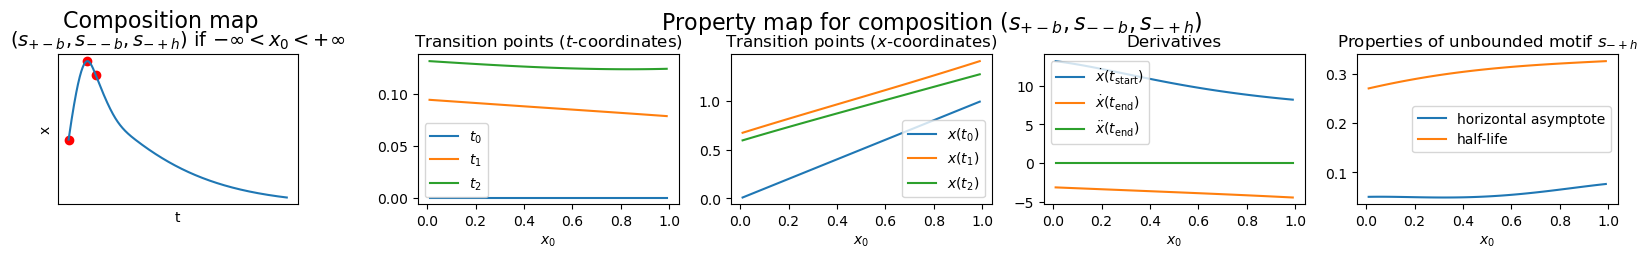

In [12]:
semantic_ode.semantic_predictor.visualize_thin((0,1), property_map_figsize=(15,2.5),composition_map_figsize=(3,2.5))
# plt.tight_layout()
# add space on the lft of the figure
plt.subplots_adjust(bottom=0.2)
# plt.savefig("pk_model_semantic_thin_1_2.pdf")

In [12]:
# semantic_ode.semantic_predictor.visualize((0,1), property_map_figsize=(20,3),composition_map_figsize=(20,2))
# plt.savefig("pk_model_semantic_1.pdf")

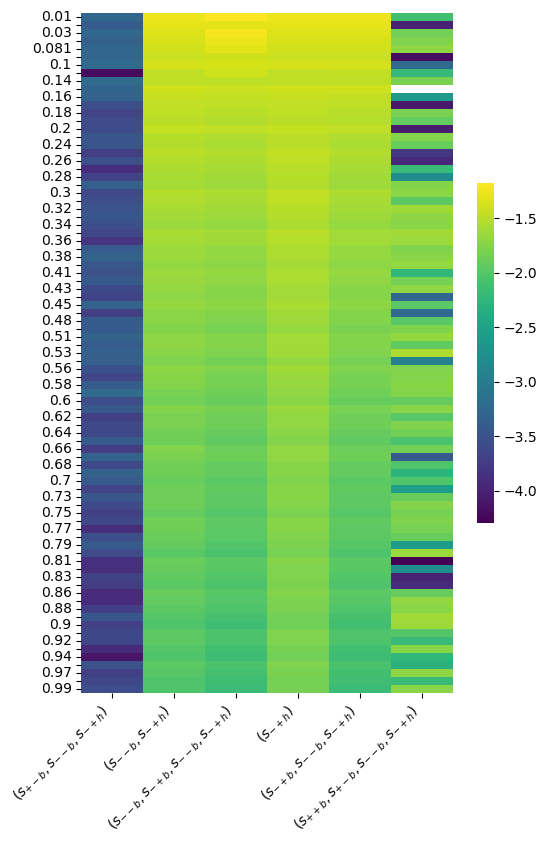

In [ ]:
fig, ax = plt.subplots(figsize=(6, 10), dpi=100)

semantic_ode.visualize_composition_scores_df(ax)
plt.subplots_adjust(bottom=0.2)
# plt.savefig("pk_model_composition_scores.pdf")

In [48]:
import torch

def new_torch_function(X,x0,y0,y1,y2):
    return torch.max(y0,torch.ones_like(y0)*1e-3).flatten()
semantic_ode.set_infinite_property_function_through_torch_model(0,0,new_torch_function)

In [69]:
semantic_ode_benchmark.prepare_data(pk_dataset, train_indices, val_indices, test_indices)
train_xs, train_ts, train_ys = semantic_ode_benchmark.X_train_val, semantic_ode_benchmark.T_train_val, semantic_ode_benchmark.Y_train_val
semantic_ode.refit_property_map(0,train_xs , train_ts, train_ys)

Refitting the property map to the data
Tuning the hyperparameters for the composition: ('+-c', '--c', '-+h')


[I 2024-11-21 00:17:49,354] A new study created in memory with name: no-name-758f3c8b-3828-4d34-8802-0a9e70fda917
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 52 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00026461848756298423


[I 2024-11-21 00:17:53,823] Trial 0 finished with value: 0.00026461848756298423 and parameters: {'dis_loss_coeff_2': 3.075807964310838e-06, 'lr': 0.00012697111322756423}. Best is trial 0 with value: 0.00026461848756298423.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 58 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00024014686641748995


[I 2024-11-21 00:17:59,949] Trial 1 finished with value: 0.00024014686641748995 and parameters: {'dis_loss_coeff_2': 2.4963175100206102e-05, 'lr': 0.005511750757691415}. Best is trial 1 with value: 0.00024014686641748995.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 56 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00022631286992691457


[I 2024-11-21 00:18:06,176] Trial 2 finished with value: 0.00022631286992691457 and parameters: {'dis_loss_coeff_2': 2.306441356351671e-06, 'lr': 0.002095749079193946}. Best is trial 2 with value: 0.00022631286992691457.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 52 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00022253033239394426


[I 2024-11-21 00:18:12,412] Trial 3 finished with value: 0.00022253033239394426 and parameters: {'dis_loss_coeff_2': 4.336996506330036e-08, 'lr': 0.029997417348655162}. Best is trial 3 with value: 0.00022253033239394426.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 64 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.0002221604809165001


[I 2024-11-21 00:18:18,991] Trial 4 finished with value: 0.0002221604809165001 and parameters: {'dis_loss_coeff_2': 2.495958668320289e-07, 'lr': 0.0011676403660687692}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 46 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00037661995156668127


[I 2024-11-21 00:18:24,263] Trial 5 finished with value: 0.00037661995156668127 and parameters: {'dis_loss_coeff_2': 9.312593842803703e-05, 'lr': 0.01307881440940144}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 52 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.0002222496987087652


[I 2024-11-21 00:18:29,500] Trial 6 finished with value: 0.0002222496987087652 and parameters: {'dis_loss_coeff_2': 1.1929975801543667e-08, 'lr': 0.01133215445049292}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 54 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.0002223250485258177


[I 2024-11-21 00:18:33,172] Trial 7 finished with value: 0.0002223250485258177 and parameters: {'dis_loss_coeff_2': 2.988951893159802e-08, 'lr': 0.13846518531662885}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 48 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.005820749793201685


[I 2024-11-21 00:18:37,842] Trial 8 finished with value: 0.005820749793201685 and parameters: {'dis_loss_coeff_2': 0.0067889457944746556, 'lr': 0.009483034914203468}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 52 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.0052500516176223755


[I 2024-11-21 00:18:43,862] Trial 9 finished with value: 0.0052500516176223755 and parameters: {'dis_loss_coeff_2': 0.005922320177157397, 'lr': 0.00020824851253449603}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 54 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.0002266435622004792


[I 2024-11-21 00:18:49,547] Trial 10 finished with value: 0.0002266435622004792 and parameters: {'dis_loss_coeff_2': 3.6938463171039087e-07, 'lr': 0.0008207461829173125}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 50 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.0002231306571047753


[I 2024-11-21 00:18:53,682] Trial 11 finished with value: 0.0002231306571047753 and parameters: {'dis_loss_coeff_2': 1.2272754988662722e-09, 'lr': 0.10175952223127224}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 46 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00022256874945014715


[I 2024-11-21 00:18:55,381] Trial 12 finished with value: 0.00022256874945014715 and parameters: {'dis_loss_coeff_2': 1.4868012595724565e-09, 'lr': 0.8422254643281838}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 62 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00022664637072011828


[I 2024-11-21 00:19:01,731] Trial 13 finished with value: 0.00022664637072011828 and parameters: {'dis_loss_coeff_2': 4.8393228856879356e-08, 'lr': 0.0007668669573578977}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 94 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.0002225008502136916


[I 2024-11-21 00:19:09,534] Trial 14 finished with value: 0.0002225008502136916 and parameters: {'dis_loss_coeff_2': 4.072395664915295e-07, 'lr': 0.0025143405198973347}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 54 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00022269262990448624


[I 2024-11-21 00:19:14,880] Trial 15 finished with value: 0.00022269262990448624 and parameters: {'dis_loss_coeff_2': 7.814519252938593e-09, 'lr': 0.047379851141435336}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 60 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.0012303836410865188


[I 2024-11-21 00:19:21,884] Trial 16 finished with value: 0.0012303836410865188 and parameters: {'dis_loss_coeff_2': 0.00057656525505916, 'lr': 0.0005556817172638661}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 64 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00022303521109279245


[I 2024-11-21 00:19:28,302] Trial 17 finished with value: 0.00022303521109279245 and parameters: {'dis_loss_coeff_2': 4.4412483097715577e-07, 'lr': 0.0015195919736881245}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 126 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.0002232184197055176


[I 2024-11-21 00:19:38,132] Trial 18 finished with value: 0.0002232184197055176 and parameters: {'dis_loss_coeff_2': 1.194397419559258e-08, 'lr': 0.006411397445468766}. Best is trial 4 with value: 0.0002221604809165001.
Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')
Finished after 90 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00023059533850755543


[I 2024-11-21 00:19:45,145] Trial 19 finished with value: 0.00023059533850755543 and parameters: {'dis_loss_coeff_2': 2.1807961834822326e-07, 'lr': 0.00034327588128230775}. Best is trial 4 with value: 0.0002221604809165001.


Best hyperparameters: {'dis_loss_coeff_2': 2.495958668320289e-07, 'lr': 0.0011676403660687692}


Seed set to 2


Fitting the model to the data using the composition: ('+-c', '--c', '-+h')


Seed set to 2


Finished after 125 epochs
Validation loss for ('+-c', '--c', '-+h'): 0.00022216065553948283
Property map refitted with validation loss: 0.00022216065553948283


In [50]:
semantic_ode, results = semantic_ode_benchmark.evaluate(semantic_ode)
print(f"Test loss: {results['test_loss']:.4f}, std: {results['test_loss_std']:.4f}")

Smoothing did not converge for all seeds and methods
Best error: 0.012974306081424913
Best derivative error: 7.105427357601002e-15
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         0.44444445]
 [0.08767219 0.98552954]
 [0.1316188  0.88155758]]
Derivative at start: 11.405522346496582
Derivative at end: -3.548797607421875
Properties of infinite motif:
[0.         0.33420205]
Second derivative at end: 0.0
Smoothing did not converge for all seeds and methods
Best error: 0.01355920672962263
Best derivative error: 7.105427357601002e-15
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         0.54545456]
 [0.08602811 1.05997062]
 [0.13014466 0.95132709]]
Derivative at start: 10.703617095947266
Derivative at end: -3.6939620971679688
Properties of infinite motif:
[0.         0.33838475]
Second derivative at end: 0.0
Test loss: 0.0175, std: 0.0030


In [16]:
semantic_ode_benchmark.prepare_data(pk_dataset_extrapolation, train_indices, val_indices, test_indices)
_, results = semantic_ode_benchmark.evaluate(semantic_ode)
print(f"Test loss: {results['test_loss']:.4f}, std: {results['test_loss_std']:.4f}")

Smoothing did not converge for all seeds and methods
Best error: 0.012974306081424913
Best derivative error: 7.105427357601002e-15
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         0.44444445]
 [0.08767219 0.98552954]
 [0.1316188  0.88155758]]
Derivative at start: 11.405522346496582
Derivative at end: -3.548797607421875
Properties of infinite motif:
[0.         0.33420205]
Second derivative at end: 0.0
Smoothing did not converge for all seeds and methods
Best error: 0.01355920672962263
Best derivative error: 7.105427357601002e-15
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         0.54545456]
 [0.08602811 1.05997062]
 [0.13014466 0.95132709]]
Derivative at start: 10.703617095947266
Derivative at end: -3.6939620971679688
Properties of infinite motif:
[0.         0.33838475]
Second derivative at end: 0.0
Test loss: 0.0150, std: 0.0023


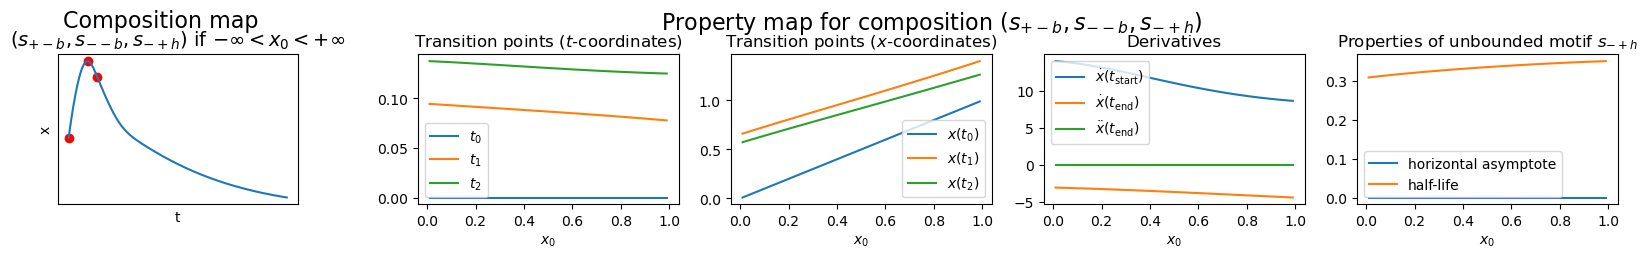

In [ ]:
semantic_ode.semantic_predictor.visualize_thin((0,1), property_map_figsize=(15,2.5),composition_map_figsize=(3,2.5))
plt.subplots_adjust(bottom=0.2)
# plt.savefig("pk_model_semantic_thin_2_2.pdf")

In [70]:
property_map = semantic_ode.semantic_predictor.property_maps[0]


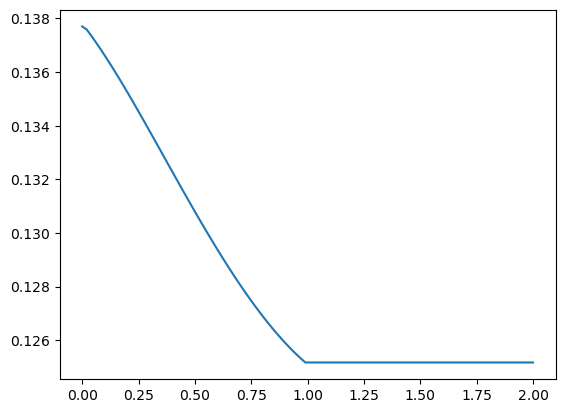

In [53]:
x0 = np.linspace(0,2,100)
y = property_map.predict_transition_point(x0,2,'t')
plt.plot(x0,y)

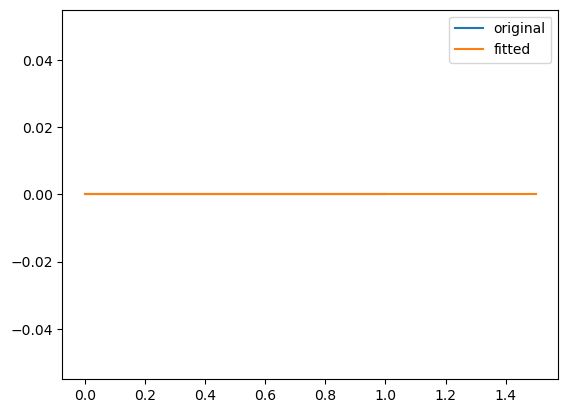

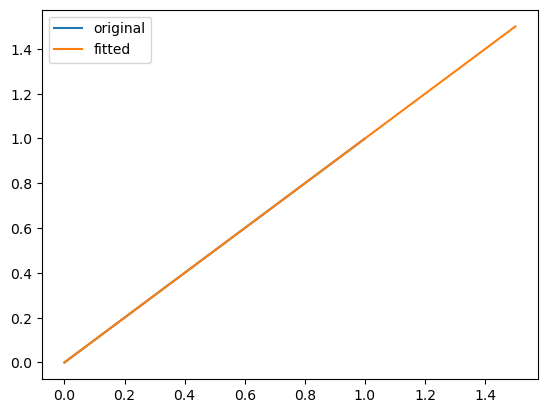

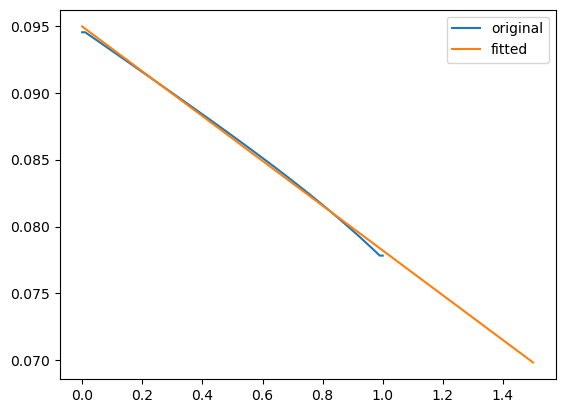

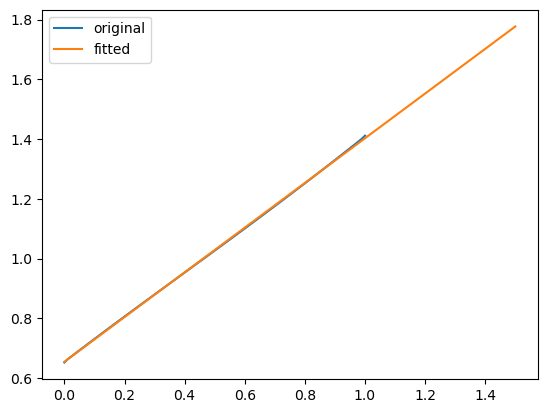

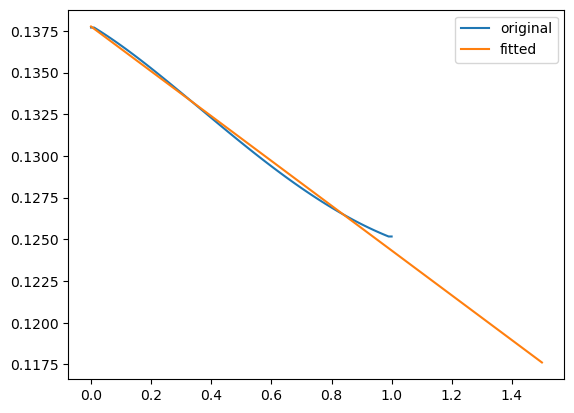

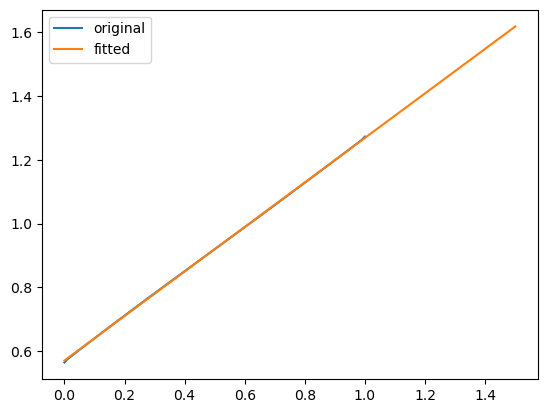

In [73]:
x0 = np.linspace(0,1,100)
x0_more = np.linspace(0,1.5,100)
new_transition_point_predictor = {}
for i in range(3):
    for coordinate in ['t','x']:
        preds = property_map.predict_transition_point(x0,i,coordinate)
        # fit a linear model to the predictions
        coeffs = np.polyfit(x0,preds,1)
        a = coeffs[0]
        b = coeffs[1]
        new_transition_point_predictor[(i,coordinate)] = lambda X, a=a, b=b: a*X + b
        plt.figure()
        plt.plot(x0,preds, label='original')
        plt.plot(x0_more,new_transition_point_predictor[(i,coordinate)](x0_more), label='fitted')
        plt.legend()

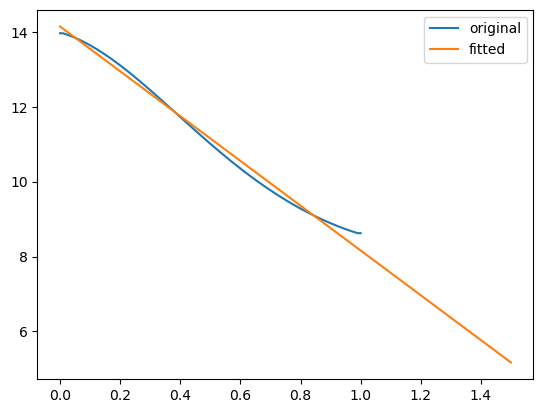

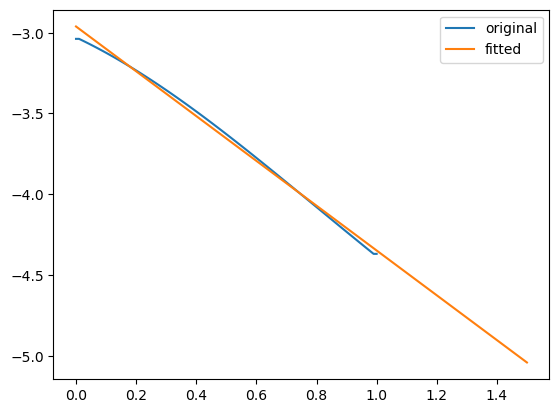

In [74]:
new_derivative_predictor = {}

for boundary in ['start','end']:
    for order in [1,2]:
        if boundary == 'start' and order == 2:
            continue
        if boundary == 'end' and order == 2:
            new_derivative_predictor[(boundary,order)] = lambda X: np.zeros_like(X)
            continue
        preds = property_map.predict_derivative(x0,boundary,order)
        # fit a linear model to the predictions
        coeffs = np.polyfit(x0,preds,1)
        a = coeffs[0]
        b = coeffs[1]
        new_derivative_predictor[(boundary,order)] = lambda X, a=a, b=b: a*X + b
        plt.figure()
        plt.plot(x0,preds, label='original')
        plt.plot(x0_more,new_derivative_predictor[(boundary,order)](x0_more), label='fitted')
        plt.legend()


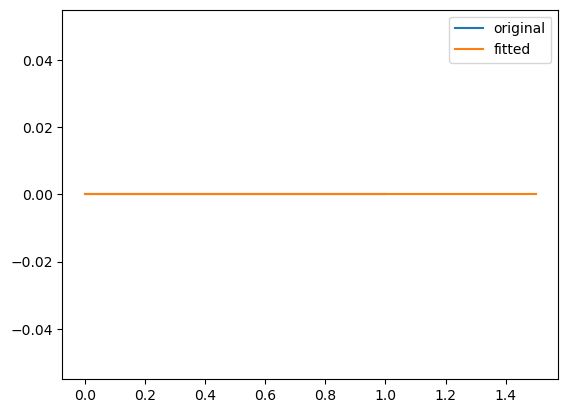

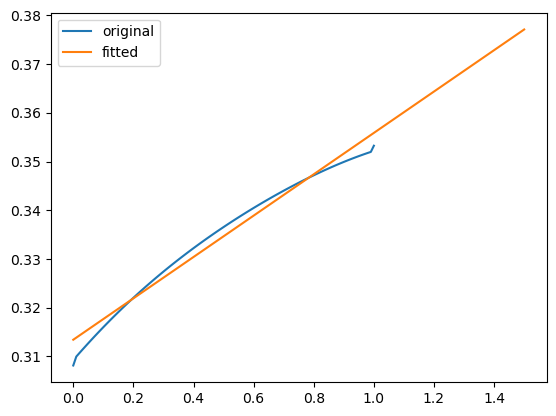

In [75]:
new_infinite_motif_predictor = []

for i in range(2):
    preds = property_map.predict_infinite_motif_property(x0,i)
    # fit a linear model to the predictions
    coeffs = np.polyfit(x0,preds,1)
    a = coeffs[0]
    b = coeffs[1]
    new_infinite_motif_predictor.append(lambda X, a=a, b=b: a*X + b)
    plt.figure()
    plt.plot(x0,preds, label='original')
    plt.plot(x0_more,new_infinite_motif_predictor[i](x0_more), label='fitted')
    plt.legend()

In [ ]:
from semantic_odes.api import SinglePropertyMap


new_property_map = SinglePropertyMap(
    (-np.inf,np.inf),
    (0,1.5),
    tuple(composition_library[0]),
    new_transition_point_predictor,
    new_derivative_predictor,
    new_infinite_motif_predictor
)

In [76]:
from copy import deepcopy
property_map = deepcopy(semantic_ode.semantic_predictor.property_maps[0])


In [79]:
semantic_ode.semantic_predictor.property_maps[0] = new_property_map

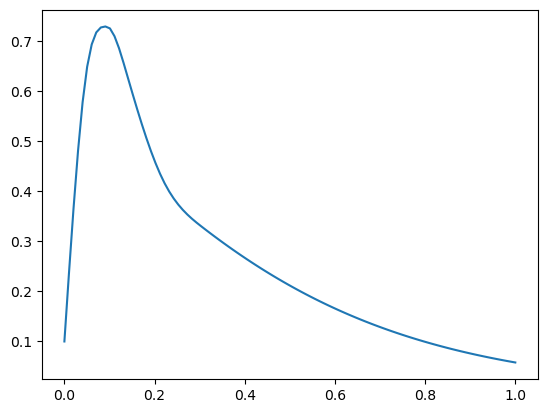

In [80]:
t = np.linspace(0,1,100)
pred = semantic_ode.predict(0.1,t)
plt.plot(t,pred)

In [81]:
semantic_ode_benchmark.prepare_data(pk_dataset, train_indices, val_indices, test_indices)
semantic_ode, results = semantic_ode_benchmark.evaluate(semantic_ode)
print(f"Test loss: {results['test_loss']:.4f}, std: {results['test_loss_std']:.4f}")

Smoothing did not converge for all seeds and methods
Best error: 0.0022586542030647028
Best derivative error: 5.329070518200751e-15
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         0.31313131]
 [0.08970769 0.88857545]
 [0.13355826 0.78922254]]
Derivative at start: 12.27101380753081
Derivative at end: -3.3955404317783167
Properties of infinite motif:
[0.         0.32672351]
Second derivative at end: 0.0
Test loss: 0.0176, std: 0.0031


In [ ]:
semantic_ode_benchmark.prepare_data(pk_dataset_extrapolation, train_indices, val_indices, test_indices)
_, results = semantic_ode_benchmark.evaluate(semantic_ode)
print(f"Test loss: {results['test_loss']:.4f}, std: {results['test_loss_std']:.4f}")

In [ ]:
from semantic_odes.datasets import Dataset
from semantic_odes.datasets import TacrolimusPK

def get_pk_dataset_extrapolation_x0(n_samples, n_measurements, noise_std, seed):

    tac = TacrolimusPK()
    default_covariates = np.array([[10,10,1,80,20,16,60,1,0]])

    v0 = np.linspace(21,25,n_samples)
    t = np.linspace(0,24,n_measurements)

    covariates = np.tile(default_covariates,(len(v0),1))
    covariates[:,1] = v0

    ys = np.stack([tac.predict(covariates[[i],:],t) for i in range(len(v0))],axis=0)/20
    ts = np.tile(t,(len(v0),1))/24
    xs = v0.reshape(-1,1)/20

    # add noise
    gen = np.random.default_rng(seed)
    ys = ys + gen.normal(0, noise_std, size=ys.shape)

    dataset_name = f"tacrolimus-extra-2_n={n_samples}_m={n_measurements}_noise={noise_std}"

    return Dataset(dataset_name,xs, ts, ys)


In [88]:
pk_dataset_extrapolation_x0 = get_pk_dataset_extrapolation_x0(n_samples=n_samples, n_measurements=n_measurements, noise_std=noise_std, seed=global_seed)

In [96]:
semantic_ode_benchmark.prepare_data(pk_dataset, train_indices, val_indices, test_indices)
semantic_ode, results = semantic_ode_benchmark.evaluate(semantic_ode)
print(f"Test loss: {results['test_loss']:.4f}, std: {results['test_loss_std']:.4f}")

Smoothing did not converge for all seeds and methods
Best error: 0.0022586542030647028
Best derivative error: 5.329070518200751e-15
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         0.31313131]
 [0.08970769 0.88857545]
 [0.13355826 0.78922254]]
Derivative at start: 12.27101380753081
Derivative at end: -3.3955404317783167
Properties of infinite motif:
[0.         0.32672351]
Second derivative at end: 0.0
Test loss: 0.0176, std: 0.0031


In [89]:
semantic_ode_benchmark.prepare_data(pk_dataset_extrapolation_x0, train_indices, val_indices, test_indices)
semantic_ode, results = semantic_ode_benchmark.evaluate(semantic_ode)
print(f"Test loss: {results['test_loss']:.4f}, std: {results['test_loss_std']:.4f}")

Smoothing did not converge for all seeds and methods
Best error: 0.006034481882729814
Best derivative error: 8.22453216642316e-13
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         1.21565657]
 [0.07459839 1.56402395]
 [0.12143608 1.41995023]]
Derivative at start: 6.871355490334567
Derivative at end: -4.647147415228661
Properties of infinite motif:
[0.         0.36503278]
Second derivative at end: 0.0
Smoothing did not converge for all seeds and methods
Best error: 0.009146962326914476
Best derivative error: 4.60964599824365e-13
Composition: ('+-c', '--c', '-+h')
Coordinates:
[[0.         1.24191919]
 [0.07415873 1.58367886]
 [0.12108334 1.43830381]]
Derivative at start: 6.714230570080396
Derivative at end: -4.683567987774501
Properties of infinite motif:
[0.         0.36614755]
Second derivative at end: 0.0
Smoothing did not converge for all seeds and methods
Best error: 0.010101977021525155
Best derivative error: 6.465938895416912e-13
Composition: ('+-c', '--c', '-+h')
Coor

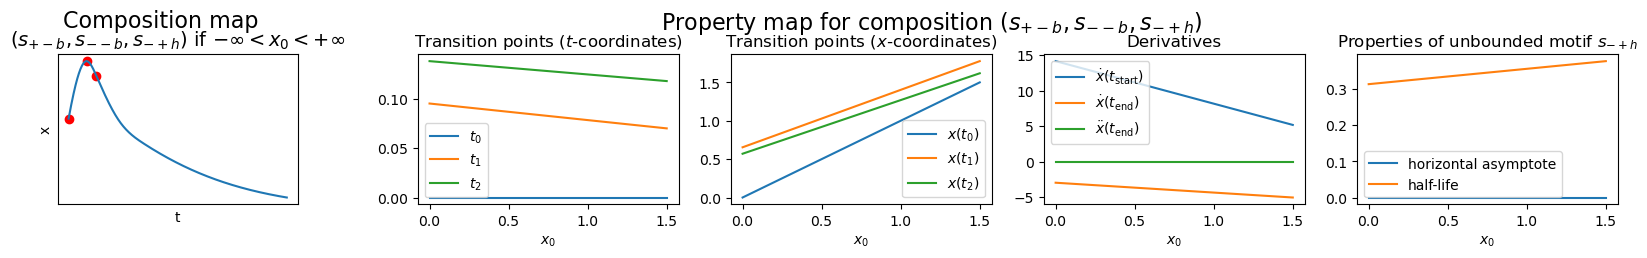

In [ ]:
semantic_ode.semantic_predictor.visualize_thin((0,1), property_map_figsize=(15,2.5),composition_map_figsize=(3,2.5))
plt.subplots_adjust(bottom=0.2)
plt.savefig("output/Pharma Semantic ODE OOD (Fig 13).pdf")